In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import random
np.set_printoptions(threshold=sys.maxsize)

In [2]:
locations = input()
obstacle=[]

line=""
line=input()
while(line!="-1"):
    obstacle.append(line)
    line=input()

In [12]:
grid=np.zeros((100,100))

startx=int(locations.split(";")[0].split(",")[0])
starty=int(locations.split(";")[0].split(",")[1])
destx=int(locations.split(";")[1].split(",")[0])
desty=int(locations.split(";")[1].split(",")[1])

grid[startx,starty]=1
grid[destx,desty]=2

In [13]:
for i in range(len(obstacle)):
    tlx=obstacle[i].split(";")[0].split(",")[0]
    tly=obstacle[i].split(";")[0].split(",")[1]
    brx=obstacle[i].split(";")[1].split(",")[0]
    bry=obstacle[i].split(";")[1].split(",")[1]

    row=int(tlx)
    while row<=int(brx):
        col=int(tly)
        while col<=int(bry):
            grid[row][col]=3
            col+=1
        row+=1

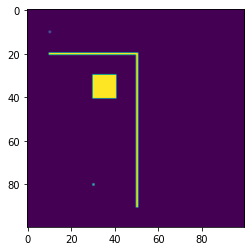

In [14]:
plt.imshow(grid)

plt.show()


In [6]:
def Dist(x1,y1,x2,y2):
    return math.sqrt(((x1-x2)**2)+((y1-y2)**2))

In [7]:
def GenerateRandomPoint(board):
    x=random.randint(1,98)
    y=random.randint(1,98)

    if (board[x,y]!=0 and board[x,y]!=board[destx,desty]):
        GenerateRandomPoint(board)
    
    return x,y

In [8]:
def GetClosestNode(Tree,RandomP):
    ShortestDist=9999999
    ShortestIndex=-1
    for i in range(len(Tree)):
        Distance=Dist(Tree[i][0],Tree[i][1],RandomP[0],RandomP[1])
        if Distance<ShortestDist:
            ShortestDist=Distance
            ShortestIndex=i
    return ShortestIndex

In [9]:
def CheckSurroundingClosest(Point,board,RandomP):
    check=[-1,0,1]
    ShortestCoords=(-1,-1)
    ShortestDist=9999999
    for k in check:
        for j in check:
            if (Point[0]>0 and Point[1]<99):
                if (board[Point[0]+k,Point[1]+j]==2):
                    return (Point[0]+k,Point[1]+j), True
                if board[Point[0]+k,Point[1]+j]==0:
                    Distance=Dist(Point[0]+k,Point[1]+j,RandomP[0],RandomP[1])
                    if Distance<ShortestDist:
                        ShortestDist=Distance
                        ShortestCoords=(Point[0]+k,Point[1]+j)
    return ShortestCoords, False


In [15]:
NewGrid=grid
StartTree=[]
Parents=[]

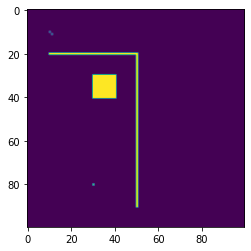

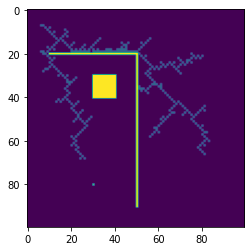

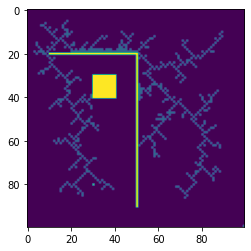

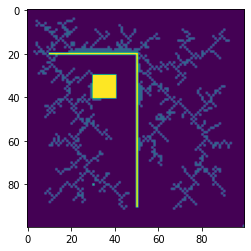

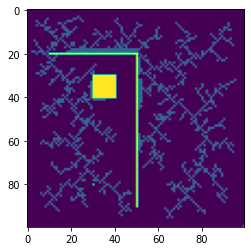

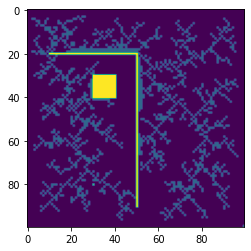

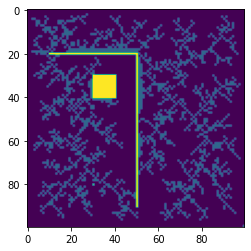

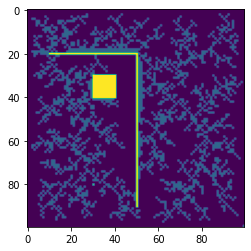

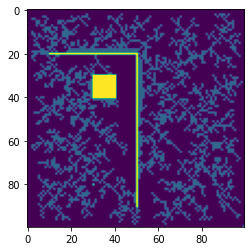

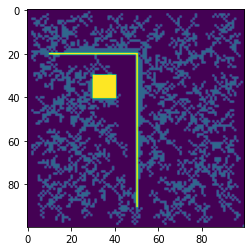

Destination Reached


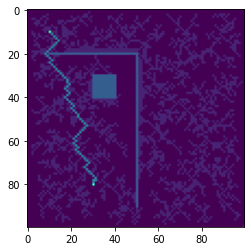

In [16]:
StartTree.append([startx,starty])

Parents.append(0)

PathFound=False
count=0

while(PathFound==False):
    
    randomp=GenerateRandomPoint(NewGrid)
    shortest=GetClosestNode(StartTree,randomp)
    closestNode=StartTree[shortest]

    NextNode, PathFound=CheckSurroundingClosest(closestNode,NewGrid,randomp)
    StartTree.append(NextNode)
    Parents.append(closestNode)
    NewGrid[NextNode]=1

    if (count%300==0):
        plt.imshow(NewGrid)
        plt.show()

    count+=1

plt.imshow(NewGrid)
plt.show()
print("Destination Reached")
path=[]
CurrentNode=NextNode
Parent=closestNode
while(CurrentNode!=[startx,starty]):
    NewGrid[CurrentNode]=5
    CurrentNode=Parent
    path.append(CurrentNode)
    for i in range(len(StartTree)):
        if StartTree[i]==CurrentNode:
            Parent=Parents[i]

NewGrid[startx,starty]=10
NewGrid[destx,desty]=10

plt.imshow(NewGrid)
plt.show()


In [18]:
path

[(79, 30),
 (78, 30),
 (78, 31),
 (77, 31),
 (76, 30),
 (75, 29),
 (74, 28),
 (73, 27),
 (72, 26),
 (71, 27),
 (70, 28),
 (69, 27),
 (68, 26),
 (67, 25),
 (66, 24),
 (65, 23),
 (64, 22),
 (63, 23),
 (62, 22),
 (61, 21),
 (60, 22),
 (59, 21),
 (58, 22),
 (57, 23),
 (56, 24),
 (55, 25),
 (54, 26),
 (53, 27),
 (52, 26),
 (51, 25),
 (50, 24),
 (49, 23),
 (48, 23),
 (47, 22),
 (46, 21),
 (45, 20),
 (44, 21),
 (43, 20),
 (42, 19),
 (41, 18),
 (40, 17),
 (39, 18),
 (38, 19),
 (37, 18),
 (36, 17),
 (35, 18),
 (34, 19),
 (33, 18),
 (32, 18),
 (31, 17),
 (30, 16),
 (29, 15),
 (28, 14),
 (27, 13),
 (26, 12),
 (25, 11),
 (24, 10),
 (23, 11),
 (22, 10),
 (21, 9),
 (20, 8),
 (19, 9),
 (18, 10),
 (17, 11),
 (16, 12),
 (15, 13),
 (14, 14),
 (13, 13),
 (12, 12),
 (11, 11),
 [10, 10]]

In [29]:
path.reverse()
path

[[10, 10],
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 13),
 (16, 12),
 (17, 11),
 (18, 10),
 (19, 9),
 (20, 8),
 (21, 9),
 (22, 10),
 (23, 11),
 (24, 10),
 (25, 11),
 (26, 12),
 (27, 13),
 (28, 14),
 (29, 15),
 (30, 16),
 (31, 17),
 (32, 18),
 (33, 18),
 (34, 19),
 (35, 18),
 (36, 17),
 (37, 18),
 (38, 19),
 (39, 18),
 (40, 17),
 (41, 18),
 (42, 19),
 (43, 20),
 (44, 21),
 (45, 20),
 (46, 21),
 (47, 22),
 (48, 23),
 (49, 23),
 (50, 24),
 (51, 25),
 (52, 26),
 (53, 27),
 (54, 26),
 (55, 25),
 (56, 24),
 (57, 23),
 (58, 22),
 (59, 21),
 (60, 22),
 (61, 21),
 (62, 22),
 (63, 23),
 (64, 22),
 (65, 23),
 (66, 24),
 (67, 25),
 (68, 26),
 (69, 27),
 (70, 28),
 (71, 27),
 (72, 26),
 (73, 27),
 (74, 28),
 (75, 29),
 (76, 30),
 (77, 31),
 (78, 31),
 (78, 30),
 (79, 30)]